In [51]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('data.csv')

In [53]:
df.head()

,report_date,location,location_type,data_field,data_field_code,time_period,time_period_type,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,NaN,NaN,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,NaN,NaN,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,NaN,NaN,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,NaN,NaN,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,NaN,NaN,127,cases


In [54]:
df.shape

(107619, 9)

In [55]:
df.unit.value_counts()

cases             106519
municipalities      1093
Name: unit, dtype: int64

In [56]:
df.time_period_type.value_counts()

Series([], Name: time_period_type, dtype: int64)

In [57]:
df.time_period.value_counts()

Series([], Name: time_period, dtype: int64)

In [58]:
df.drop(columns=['time_period','time_period_type'],inplace=True)

In [59]:
df.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


In [60]:
#1. show data field code 'AR0005' values for 'Argentina-Catamarca' for entire duration
df.loc[(df.location=='Argentina-Catamarca') & (df.data_field_code=='AR0005')]

,report_date,location,location_type,data_field,data_field_code,value,unit
16,2016-03-19,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,14,cases
160,2016-03-26,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
304,2016-04-02,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
448,2016-04-09,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
592,2016-04-16,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
736,2016-04-29,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
880,2016-05-07,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16,cases
1024,2016-05-14,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases
1168,2016-05-22,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,16,cases
1312,2016-05-30,Argentina-Catamarca,province,cumulative_cases_under_study,AR0005,15,cases


In [61]:
df.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
0,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_local_cases,AR0001,0,cases
1,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_local_cases,AR0002,0,cases
2,2016-03-19,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,AR0003,2,cases
3,2016-03-19,Argentina-Buenos_Aires,province,cumulative_probable_imported_cases,AR0004,1,cases
4,2016-03-19,Argentina-Buenos_Aires,province,cumulative_cases_under_study,AR0005,127,cases


In [62]:
df2 = df[(df.unit=='cases') & ((df.location=='Argentina-Catamarca') | (df.location=='Argentina-CABA'))]

In [63]:
df2.value = pd.to_numeric(df2.value)

In [64]:
df2.dtypes

report_date        object
location           object
location_type      object
data_field         object
data_field_code    object
value               int64
unit               object
dtype: object

In [65]:
df2.head()

,report_date,location,location_type,data_field,data_field_code,value,unit
6,2016-03-19,Argentina-CABA,province,cumulative_confirmed_local_cases,AR0001,0,cases
7,2016-03-19,Argentina-CABA,province,cumulative_probable_local_cases,AR0002,0,cases
8,2016-03-19,Argentina-CABA,province,cumulative_confirmed_imported_cases,AR0003,9,cases
9,2016-03-19,Argentina-CABA,province,cumulative_probable_imported_cases,AR0004,0,cases
10,2016-03-19,Argentina-CABA,province,cumulative_cases_under_study,AR0005,68,cases


In [66]:
df2 = df2.groupby('location')

In [67]:
df2.get_group('Argentina-CABA')

,report_date,location,location_type,data_field,data_field_code,value,unit
6,2016-03-19,Argentina-CABA,province,cumulative_confirmed_local_cases,AR0001,0,cases
7,2016-03-19,Argentina-CABA,province,cumulative_probable_local_cases,AR0002,0,cases
8,2016-03-19,Argentina-CABA,province,cumulative_confirmed_imported_cases,AR0003,9,cases
9,2016-03-19,Argentina-CABA,province,cumulative_probable_imported_cases,AR0004,0,cases
10,2016-03-19,Argentina-CABA,province,cumulative_cases_under_study,AR0005,68,cases
11,2016-03-19,Argentina-CABA,province,cumulative_cases_discarded,AR0006,1,cases
150,2016-03-26,Argentina-CABA,province,cumulative_confirmed_local_cases,AR0001,0,cases
151,2016-03-26,Argentina-CABA,province,cumulative_probable_local_cases,AR0002,0,cases
152,2016-03-26,Argentina-CABA,province,cumulative_confirmed_imported_cases,AR0003,9,cases
153,2016-03-26,Argentina-CABA,province,cumulative_probable_imported_cases,AR0004,0,cases


In [68]:
caba_df = df2.get_group('Argentina-CABA').groupby('data_field_code').size().reset_index(name='caba_count')
caba_df.set_index('data_field_code',inplace=True)

In [69]:
caba_df.dtypes

caba_count    int64
dtype: object

In [70]:
catamarca_df = df2.get_group('Argentina-Catamarca').groupby('data_field_code').size().reset_index(name='cata_count')
catamarca_df.set_index('data_field_code',inplace=True)

In [71]:
catamarca_df.dtypes

cata_count    int64
dtype: object

Text(0, 0.5, 'Count')

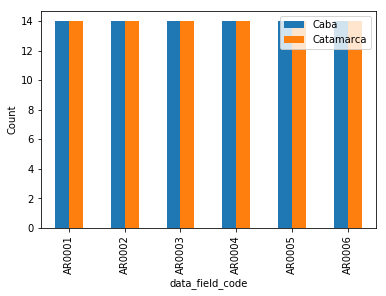

In [72]:
# Plot 'Argentina-CABA' and 'Argentina-Catamarca' for number of cases values for 
# entire duration to identify the difference
# Note: I have done this by subgrouping it across different data field codes
pd.DataFrame({'Caba':caba_df['caba_count'],'Catamarca':catamarca_df['cata_count']}).plot(kind='bar')
plt.ylabel('Count')

In [73]:
df3 = df[(df.location=='Argentina-Buenos_Aires') | (df.location=='Argentina-CABA') | (df.location=='Argentina-Catamarca')].groupby('location')

In [74]:
#Plot how data field values are distributed across the locations 'Argentina-Buenos_Aires', 'Argentina-CABA', 'Argentina-Catamarca'

In [75]:
df3.groups

{'Argentina-Buenos_Aires': Int64Index([   0,    1,    2,    3,    4,    5,  144,  145,  146,  147,  148,
              149,  288,  289,  290,  291,  292,  293,  432,  433,  434,  435,
              436,  437,  576,  577,  578,  579,  580,  581,  720,  721,  722,
              723,  724,  725,  864,  865,  866,  867,  868,  869, 1008, 1009,
             1010, 1011, 1012, 1013, 1152, 1153, 1154, 1155, 1156, 1157, 1296,
             1297, 1298, 1299, 1300, 1301, 1440, 1441, 1442, 1443, 1444, 1445,
             1584, 1585, 1586, 1587, 1588, 1589, 1728, 1729, 1730, 1731, 1732,
             1733, 1872, 1873, 1874, 1875, 1876, 1877],
            dtype='int64'),
 'Argentina-CABA': Int64Index([   6,    7,    8,    9,   10,   11,  150,  151,  152,  153,  154,
              155,  294,  295,  296,  297,  298,  299,  438,  439,  440,  441,
              442,  443,  582,  583,  584,  585,  586,  587,  726,  727,  728,
              729,  730,  731,  870,  871,  872,  873,  874,  875, 1014, 1015,
   

Text(0.5, 1.0, 'Data Field Value Distribution for Argentina-Buenos_Aires')

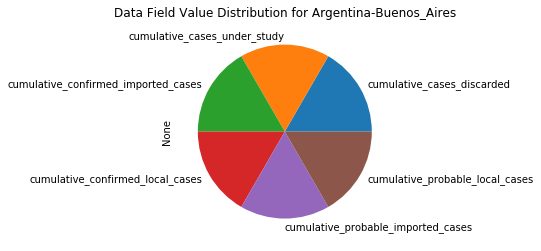

In [77]:
df3.get_group('Argentina-Buenos_Aires').groupby('data_field').size().plot(kind='pie')
plt.title('Data Field Value Distribution for Argentina-Buenos_Aires')

Text(0.5, 1.0, 'Data Field Value Distribution for Argentina-CABA')

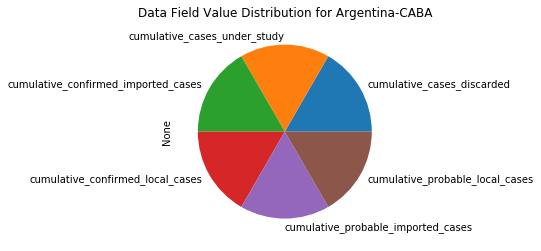

In [78]:
df3.get_group('Argentina-CABA').groupby('data_field').size().plot(kind='pie')
plt.title('Data Field Value Distribution for Argentina-CABA')

Text(0.5, 1.0, 'Data Field Value Distribution for Argentina-Catamarca')

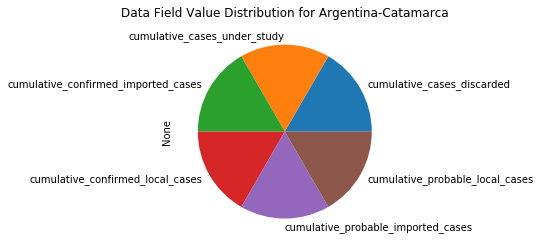

In [79]:
df3.get_group('Argentina-Catamarca').groupby('data_field').size().plot(kind='pie')
plt.title('Data Field Value Distribution for Argentina-Catamarca')